In [1]:
# Recurrent Neural Network (RNN)

In [2]:
# PART 1 : Data Preprocessing:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the training set

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [4]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 120 timestamps and 1 output

X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i - 120 : i , 0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)

In [6]:
# Reshaping

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))


In [7]:
# PART 2 : Building the RNN


In [8]:
# Importing keras libs and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\rutwi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# Initializing the RNN

regressor = Sequential()

# Adding the 1st LSTM Layer and some Dropout

regressor.add(LSTM(units=80, return_sequences=True, input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

# Adding the 2nd LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the 3rf LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

#EXTRA LSTM LAYERS:

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding 4th LSTM Layer and Dropout

regressor.add(LSTM(units=80, return_sequences=False))
regressor.add(Dropout(0.2))

# Adding the Output Layer

regressor.add(Dense(units=1))

# Compiling the RNN

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Fitting the RNN to the Training Set
regressor.fit( X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1138/1138 [==============================] - 58s 51ms/step - loss: 0.0537
Epoch 2/100
1138/1138 [==============================] - 51s 44ms/step - loss: 0.0066
Epoch 3/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0058
Epoch 4/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0062
Epoch 5/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0048
Epoch 6/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0049
Epoch 7/100
1138/1138 [==============================] - 48s 43ms/step - loss: 0.0046
Epoch 8/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0056
Epoch 9/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0049
Epoch 10/100
1138/1138 [==============================] - 48s 42ms/step - loss: 0.0047
Epoch 11/100
1138/1138 [==============================] - 47s 42ms/step - loss: 0.0042
Epoch 12/100
1138/1138 [============================

1138/1138 [==============================] - 61s 54ms/step - loss: 0.0015
Epoch 96/100
1138/1138 [==============================] - 61s 54ms/step - loss: 0.0015
Epoch 97/100
1138/1138 [==============================] - 61s 54ms/step - loss: 0.0015
Epoch 98/100
1138/1138 [==============================] - 61s 54ms/step - loss: 0.0013
Epoch 99/100
1138/1138 [==============================] - 61s 54ms/step - loss: 0.0015
Epoch 100/100
1138/1138 [==============================] - 61s 54ms/step - loss: 0.0015


In [11]:
# PART 3: Making the Predictions and Visualizing the Results


In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[: , 1:2].values

In [13]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]) , axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120 : ].values
inputs = inputs.reshape(-1 , 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i - 120 : i , 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

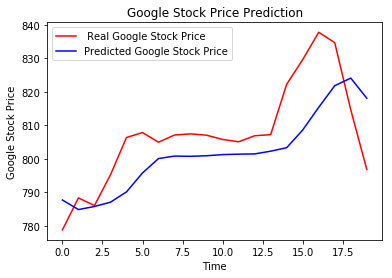

In [14]:
# Visualizing the Results :

plt.plot(real_stock_price, color = 'red' , label = ' Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price') 
plt.legend()
plt.show()